In [45]:
pip install SimpleITK

In [46]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/FYP/Model/')

In [48]:
import OneForAll_1 as ModelForAll
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [49]:
from keras.utils import to_categorical


In [50]:
Diagnose = []

## Load Model

In [51]:
BinaryDirectClass_3D = ModelForAll.Binary_Direct_Classification_3D_Model()
BinaryLungSegClass_3D = ModelForAll.Binary_LungSeg_Classification_3D_Model()
ThreeClass_3D = ModelForAll.ThreeClass_Classification_3D_Model()
LungSeg_3D = ModelForAll.lungSegmentation_3D_Model()
InfectSeg_3D = ModelForAll.InfectSegmentation_3D_Model()
Binary_2D = ModelForAll.Binary2DirClass()

## Load Weights

In [ ]:
BinaryLungSegClass_3D.load_weights('/content/drive/MyDrive/FYP/Model/Untitled folder/3D_LungSeg_Binary_classification (1).h5')
ThreeClass_3D.load_weights('/content/drive/MyDrive/FYP/Model/3D_CT_3ClassClassification (2).h5')
LungSeg_3D.load_weights('/content/drive/MyDrive/FYP/Model/3D_CT_Lung Segmentation.h5')
InfectSeg_3D.load_weights('/content/drive/MyDrive/FYP/Model/3D_CT_Infectious_Area_Segmentation.h5')
Binary_2D.load_weights('/content/drive/MyDrive/FYP/Model/2D_CT_BinaryClassification.h5')

## Preprocess the demo data

In [ ]:
from LungSegmentation_Threshold_3D import get_segmented_lungs
from CT_Preprocess_3D import getScan
from CT_Preprocess_3D import normalizeScan
from CT_Preprocess_3D import resizeScan
from CT_Preprocess_3D import preprocessScan

In [ ]:
case_1 = ['/content/drive/MyDrive/FYP/Model/Demo/Demo_1.nii.gz']
case_2 = ['/content/drive/MyDrive/FYP/Model/Demo/Demo_2.nii.gz']
case_3 = ['/content/drive/MyDrive/FYP/Model/Demo/Demo_3.nii.gz']
case_4 = ['/content/drive/MyDrive/FYP/Model/Demo/Demo_1.png']
case_5 = ['/content/drive/MyDrive/FYP/Model/Demo/Demo_2.jpg']

In [ ]:
import cv2

test1 = cv2.imread(case_4[0])
test_1 = cv2.resize(test1,(128,128))
test2 = cv2.imread(case_5[0])
test_2 = cv2.resize(test2,(128,128))

In [ ]:
test_2.shape

(128, 128, 3)

## Demo

In [ ]:
test=[]
test.append(case_1)
test.append(case_2)
test.append(case_3)


for x in test:
  test_=[]
  scan_test=[]
  scan_1 = getLungSegScan(x[0])
  test_.append(scan_1)
  binaryPredResult = BinaryLungSegClass_3D.predict(np.array(test_))
  result = np.argmax(binaryPredResult,axis=1)
  #print(result)

  if(result[0]==1):
    scan = preprocessScan(x[0])
    scan_test.append(scan)
    x.append("Positive")
    threePredResult = ThreeClass_3D.predict(np.array(scan_test))[0]
    #print(threePredResult)
    result_1 = np.argmax(threePredResult)
    #print(result_1)

    if(result_1==0):
      x.append("several ground-glass opacifications, involvement of lung parenchyma is less than 25%.")
    if(result_1==1):
      x.append("ground-glass opacifications, involvement of lung parenchyma is between 25 and 50%.")
    if(result_1==2):
      x.append("ground-glass opacifications and regions of consolidation, involvement of lung parenchyma is between 50 and 75%")

    infecSeg_1 = InfectSeg_3D.predict(np.array(scan_test))[0]
    CT_Scan,mask_new = getInfectAreaImg(infecSeg_1)
    x.append(CT_Scan)
    x.append(mask_new)

  else:
      x.append("Negative. Normal lung tissue. No CT-signs of viral pneumonia")



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Positive
several ground-glass opacifications, involvement of lung parenchyma is less than 25%.


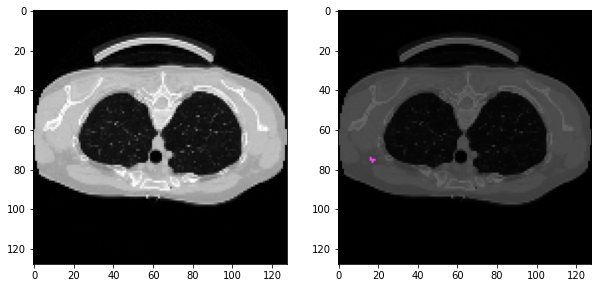

In [ ]:
print(case_1[1])
print(case_1[2])
f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.imshow(case_1[3])
f.add_subplot(1,2, 2)
plt.imshow(case_1[4])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Positive
ground-glass opacifications, involvement of lung parenchyma is between 25 and 50%.


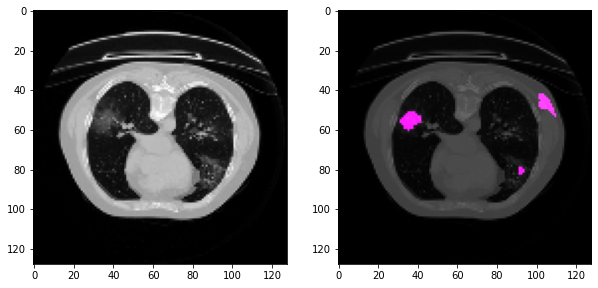

In [ ]:
print(case_2[1])
print(case_2[2])
f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.imshow(case_2[3])
f.add_subplot(1,2, 2)
plt.imshow(case_2[4])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Positive
ground-glass opacifications and regions of consolidation, involvement of lung parenchyma is between 50 and 75%


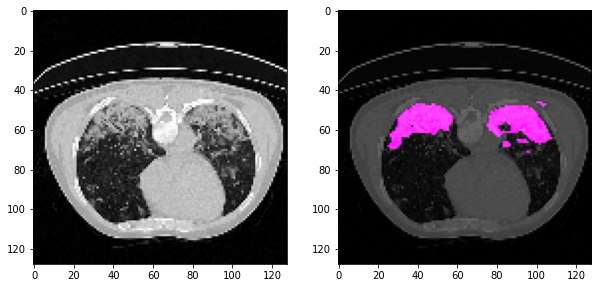

In [ ]:
print(case_3[1])
print(case_3[2])
f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.imshow(case_3[3])
f.add_subplot(1,2, 2)
plt.imshow(case_3[4])
plt.show()

In [ ]:
infecSeg_1.shape

(128, 128, 64, 2)

In [ ]:
len(case_1),len(case_2),len(case_3)

(5, 5, 5)

## **Test Binary Classification**

In [ ]:
binaryPredResult = BinaryLungSegClass_3D.predict(test)
result = np.argmax(binaryPredResult,axis=1)

In [ ]:
cord = np.where(result == 1)

In [ ]:
cord = np.array(cord)

Add original CT to 3 class classification

In [ ]:
test=[]

scan_1 = preprocessScan('/content/drive/MyDrive/FYP/Model/Demo/Demo_1.nii.gz')
test.append(scan_1)

scan_2 = preprocessScan('/content/drive/MyDrive/FYP/Model/Demo/Demo_2.nii.gz')
test.append(scan_2)

scan_3= preprocessScan('/content/drive/MyDrive/FYP/Model/Demo/Demo_3.nii.gz')
test.append(scan_3)


test = np.array(test)

## **Test 3 Positive Class Classification**

In [ ]:
test.shape

(7, 128, 128, 64, 1)

In [ ]:
threePredResult = ThreeClass_3D.predict(test)
print(np.argmax(threePredResult,axis=1))

[0 1 2]


## **U-Net Lung Seg Test**


In [ ]:
predSeg = LungSeg_3D.predict(test)[0]
mask,lungScan = coverMaskLung(scan_0,predSeg)

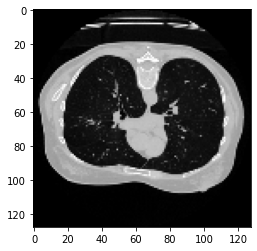

In [ ]:
plt.imshow(test[0][:,:,30,0],cmap='gray')

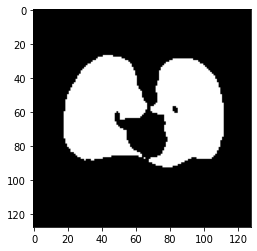

In [ ]:
plt.imshow(mask[:,:,30,0],cmap='gray')

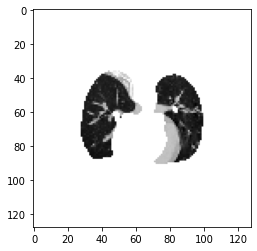

In [ ]:
plt.imshow(lungScan[:,:,30,0],cmap='gray')

## **Test Infect Segmentation**

In [ ]:
test.shape

(3, 128, 128, 64, 1)

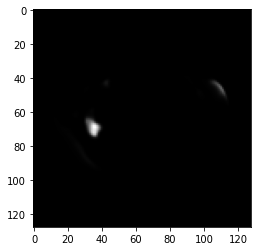

In [ ]:
infecSeg_1 = InfectSeg_3D.predict(test)[1]
plt.imshow(infecSeg_1[:,:,40,1],cmap='gray')

### Get and Combine the mask

In [ ]:
CT_Scan,mask_new = getInfectAreaImg(infecSeg_1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


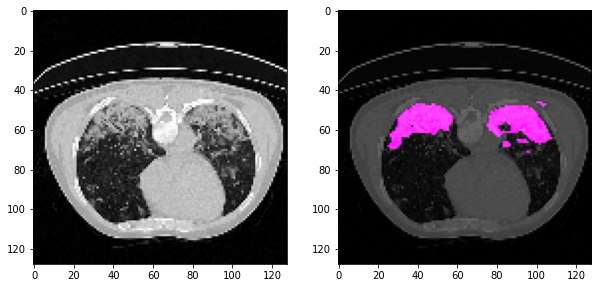

In [ ]:
f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.imshow(case_3[3])
f.add_subplot(1,2, 2)
plt.imshow(case_3[4])
plt.show()

## Display Diagnose Result

## Assist Method

In [ ]:
def getLungSegScan(ScanPath):

  scan = getScan(ScanPath)
  lungMask = np.array([get_segmented_lungs(slice.copy()) for slice in scan])
  scan[~lungMask] = 0
  scan = normalizeScan(scan)


  if(scan.shape[0] != scan.shape[1]):
      scan = np.swapaxes(scan,0,1)  #(64,128,128) => (128,128,64)
      scan = np.swapaxes(scan,1,2)
      
  scan = resizeScan(scan,(128,128,64))
  scan = np.expand_dims(scan,axis=-1)

  return scan

In [ ]:
def coverMaskLung(lungScan,Mask):

    predOneDim = predSeg[:,:,:,1]
    predOneDim = np.expand_dims(predOneDim,-1)

    predOneCo = np.where(predOneDim < 0.5,predOneDim,1)
    predOneCo = np.where(predOneCo > 0.5,predOneCo,0)

    NonwhiteCord = np.where(predOneCo!=1)
    NonWhiteArea = zip(NonwhiteCord[0],NonwhiteCord[1],NonwhiteCord[2],NonwhiteCord[3])
    arr1 = np.array(tuple(NonWhiteArea))

    for item in arr1:
      lungScan[item[0],item[1],item[2],item[3]] = 1

    return predOneCo,lungScan

In [ ]:
def getInfectAreaImg (InfectSeg_3DPredict):

  predOneDim = InfectSeg_3DPredict[:,:,:,1]
  predOneDim = np.expand_dims(predOneDim,-1)
  # print(predOneDim.shape)
  predOneCo = np.where(predOneDim < 0.1,predOneDim,1)
  predOneCo = np.where(predOneCo > 0.1,predOneCo,0)

  scan = np.squeeze(predOneCo)

  scan = np.swapaxes(scan,1,2)
  scan = np.swapaxes(scan,0,1)
  # print(scan.shape)

  whiteSum=[]
  for slice in scan:
    sumWhite = np.sum(slice)
    whiteSum.append(sumWhite)

  index = np.argmax(whiteSum)
  # print(index)
  # print(np.max(np.array(whiteSum)))

  #CTImg = test[1][:,:,index,0]
  CTImg = np.array(scan_test)[0][:,:,index,0]
  CTImg_3Channel = np.stack((CTImg,)*3, axis=-1)
  # print(CTImg_3Channel.shape)

  MaskImg = scan[index]
  mask_3channel = np.stack((MaskImg,)*3, axis=-1)
  # print(mask_3channel.shape)

  mask_new = np.swapaxes(mask_3channel,1,2)
  mask_new = np.swapaxes(mask_new,0,1)
  # print(mask_new.shape)
  mask_new_d1 = np.where(mask_new[0] == 0, mask_new[0],60)
  mask_new_d2 = np.where(mask_new[0] == 0, mask_new[0],0)
  mask_new_d3 = np.where(mask_new[0] == 0, mask_new[0],10)
  mask_new[0] = mask_new_d1
  mask_new[1] = mask_new_d2
  mask_new[2] = mask_new_d3
  # print(mask_new.shape)
  mask_new = np.swapaxes(mask_new,0,1)
  mask_new = np.swapaxes(mask_new,1,2)
  # print(mask_new.shape)

  dst = cv2.addWeighted(CTImg_3Channel, 0.4, mask_new, 0.6, 0)
  dst.shape

  return CTImg_3Channel,dst